# Comp 4

Peter Vanya

Jarná škola FX, marec 2016

## Fyzika
* integrovanie
* diferenciálne rovnice

In [5]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from math import *
%matplotlib inline

## 1. problém: obiehanie Zeme okolo Slnka

Fyziku (dúfam!) všetci poznáme.

* gravitačná sila:
$$ \mathbf F(\mathbf r) = -\frac{G m M}{r^3} \mathbf r $$

### Eulerov algoritmus (zlý)
$$\begin{align}
a(t) &= F(t)/m \\
v(t+dt) &= v(t) + a(t) dt \\
x(t+dt) &= x(t) + v(t) dt \\
\end{align}$$

### Verletov algoritmus (dobrý)
$$ x(t+dt) = x(t) -2 x(t-dt) + a(t) dt^2 $$

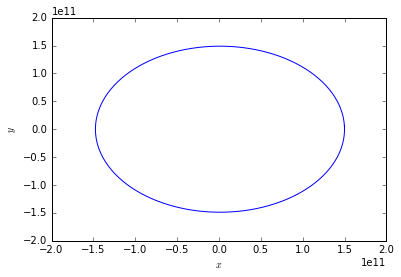

In [67]:
G = 6.67e-11
Ms = 2e30
Mz = 6e24
dt = 86400.0
N = int(365*86400.0/dt)
#print(N)

R0 = 1.5e11
r_list = np.zeros((N, 2))
r_list[0] = [R0, 0.0]     # mozno miesat listy s ndarray

V0 = 29.7e3
v_list = np.zeros((N, 2))
v_list[0] = [0.0, v0]

# sila medzi planetami
def force(A, r):
#    theta = asin(r[1]/sqrt(r[0]**2 + r[1]**2))
#    print(theta)
    return -A / norm(r)**3 * r

# Verletova integracia
def verlet_step(r_n, r_nm1, a, dt):
    return 2*r_n - r_nm1 + a*dt**2

# prvy krok je specialny
a = force(G*Ms, r_list[0])
r_list[1] = r_list[0] + v_list[0]*dt + a*dt**2/2


# riesenie pohybovych rovnic
for i in range(2, N):
    a = force(G*Ms, r_list[i-1])
    r_list[i] = verlet(r_list[i-1], r_list[i-2], a, dt)
    
    
plt.plot(r_list[:, 0], r_list[:, 1])
plt.xlim([-2e11, 2e11])
plt.ylim([-2e11, 2e11])
plt.xlabel("$x$")
plt.ylabel("$y$")
#plt.gca().set_aspect('equal', adjustable='box')
#plt.axis("equal")
plt.show()

## Pridajme Mesiac

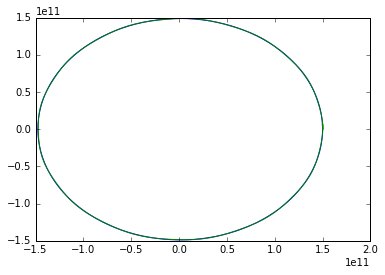

In [79]:
Mm = 7.3e22
R0m = R0 + 384e6
v0m = v0 + 1e3
rm_list = np.zeros((N, 2))
rm_list[0] = [R0m, 0.0]
vm_list = np.zeros((N, 2))
vm_list[0] = [0.0, v0m]

# prvy Verletov krok
am = force(G*Ms, rm_list[0]) + force(G*Mz, rm_list[0] - r_list[0])
rm_list[1] = rm_list[0] + vm_list[0]*dt + am*dt**2/2

# riesenie pohybovych rovnic
for i in range(2, N):
    a = force(G*Ms, r_list[i-1])
    am = force(G*Ms, rm_list[i-1]) + force(G*Mz, rm_list[i-1]-r_list[i-1])
    r_list[i] = verlet(r_list[i-1], r_list[i-2], a, dt)
    rm_list[i] = verlet(rm_list[i-1], rm_list[i-2], am, dt)
    
plt.plot(r_list[:, 0], r_list[:, 1])
plt.plot(rm_list[:, 0], rm_list[:, 1])
#plt.xlim([1.4e11, 1.6e11])
#plt.ylim([0e11, 0.4e11])
plt.show()   # mesiac moc nevidno

---
## Derivovanie

Trochu teórie:
$$ \frac{df}{dx} = \frac{f(x+h) - f(x-h)}{2h} $$

Zvolíme si malé $h$ a derivujeme.

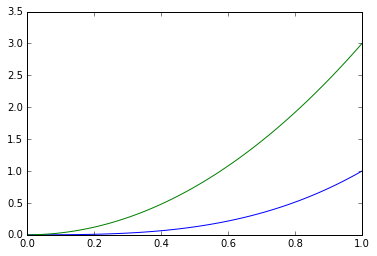

In [9]:
def func(x):
    return x**3

def deriv(f, x, h=0.01):
    return (f(x+h)-f(x-h))/(2*h)

x = np.linspace(0, 1, 100)
y = [func(i) for i in x]
dydx = [deriv(func, i) for i in x]

plt.plot(x, y, x, dydx)
plt.show()

---
## Integrovanie

Ťažšie, ale pomôžu nám knižnice. Dva spôsoby:
* kvadratúra (dobrá v 1d, ale so zvyšovaním rozmerov presnosť klesá)
* Monte Carlo (presnosť vždy $O(N^{-1/2}$, použiť pri viac ako troch rozmeroch)

Tu si vysvetlíme kvadratúru.

In [10]:
from scipy.integrate import quad

quad(func, 0, 1)   # vysledok je 1/4

(0.25, 2.7755575615628914e-15)